In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Harsh\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('Employee.csv')

In [3]:
data.head(3)

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0


In [4]:
data.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [5]:
data.duplicated().sum()

4

In [6]:
data =data.drop_duplicates()

In [7]:
data =data.reset_index(drop = True)

In [8]:
data

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
139,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
140,TCS,33.0,9024.0,Calcutta,India,1
141,Infosys,44.0,4034.0,Delhi,India,1
142,TCS,33.0,5034.0,Mumbai,India,1


In [9]:
unique=data.nunique()
unique

Company     6
Age        29
Salary     40
Place      11
Country     1
Gender      2
dtype: int64

In [10]:
data['Company'].value_counts()

Company
TCS                          52
Infosys                      43
CTS                          35
Tata Consultancy Services     2
Congnizant                    2
Infosys Pvt Lmt               2
Name: count, dtype: int64

In [11]:
data['Company'] = data['Company'].str.replace('Tata Consultancy Services','TCS')
data['Company'] = data['Company'].str.replace('Infosys Pvt Lmt','Infosys ')
data['Company']= data['Company'].str.replace('Congnizant','CTS')

In [12]:
data['Company'].value_counts()

Company
TCS         54
Infosys     43
CTS         37
Infosys      2
Name: count, dtype: int64

In [13]:
data['Company']= data['Company'].str.replace('Infosys ','Infosys')

In [14]:
pro = data['Company'].value_counts(normalize = True)

In [15]:
data.loc[data['Company'].isna(),'Company']=np.random.choice(pro.index,size =data['Company'].isna().sum(),p= pro.values)

# fill missing values with percentage of each value.

In [16]:
data['Company'].value_counts()

Company
TCS        56
Infosys    48
CTS        40
Name: count, dtype: int64

In [17]:
mean_salary = round(data['Salary'].mean(), 0)
mean_salary

5283.0

In [18]:
data['Salary'] = data['Salary'].fillna(mean_salary)

# fill missing value of salary using mean.

In [19]:
data

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5283.0,Chennai,India,0
1,Infosys,30.0,5283.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,India,0
140,TCS,33.0,9024.0,Calcutta,India,1
141,Infosys,44.0,4034.0,Delhi,India,1
142,TCS,33.0,5034.0,Mumbai,India,1


In [20]:
prod = data['Place'].value_counts(normalize = True)

In [21]:
data.loc[data['Place'].isna(),'Place']=np.random.choice(pro.index,size =data['Place'].isna().sum(),p= pro.values)

# filling missing places data 

In [22]:
mean_age = round(data['Age'].mean(), 0)
mean_age

31.0

In [23]:
data['Age'] = data['Age'].fillna(mean_salary)

In [24]:
data.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

In [25]:
for column in data.columns:
    print(data[column].value_counts())
    print("*"*20)

Company
TCS        56
Infosys    48
CTS        40
Name: count, dtype: int64
********************
Age
5283.0    17
22.0      15
33.0      13
44.0      10
23.0       8
34.0       8
21.0       7
32.0       7
35.0       6
0.0        6
41.0       5
24.0       4
45.0       4
31.0       3
43.0       3
25.0       3
20.0       3
36.0       3
40.0       3
26.0       2
30.0       2
46.0       2
50.0       2
37.0       2
19.0       1
38.0       1
51.0       1
18.0       1
17.0       1
54.0       1
Name: count, dtype: int64
********************
Salary
5283.0    23
3000.0     9
5000.0     6
4034.0     5
5034.0     5
8202.0     5
7084.0     4
8943.0     4
2934.0     4
2034.0     4
2300.0     4
9284.0     4
8345.0     4
3184.0     4
9024.0     4
3045.0     4
1234.0     4
1089.0     4
4824.0     3
5835.0     3
8000.0     3
3030.0     3
9000.0     3
6000.0     3
8787.0     3
7000.0     3
3234.0     2
9876.0     2
7654.0     2
4000.0     2
4345.0     1
6544.0     1
6543.0     1
4324.0     1
5435.0     1


In [26]:
data['Place'].value_counts()

Place
Mumbai        34
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
CTS            6
Infosys        5
Podicherry     3
TCS            3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

In [27]:
data['Place'] = data['Place'].replace({'CTS': 'Chennai','TCS': 'Mumbai','Infosys': 'Calcutta'})

# replacing companies to city name with top 3 places

In [28]:
data['Place']= data['Place'].str.replace('Calcutta','kolkata')
data['Place']= data['Place'].str.replace('Podicherry','Pondicherry')

In [29]:
data['Place'].value_counts()

Place
Mumbai         37
kolkata        37
Chennai        20
Delhi          14
Cochin         13
Noida           8
Hyderabad       8
Pondicherry     3
Pune            2
Bhopal          1
Nagpur          1
Name: count, dtype: int64

In [30]:
place_counts = data['Place'].value_counts()
rare = place_counts[place_counts < 5].index
data['Place'] = data['Place'].replace(rare, 'Other')

In [31]:
data['Place'].value_counts()

Place
Mumbai       37
kolkata      37
Chennai      20
Delhi        14
Cochin       13
Noida         8
Hyderabad     8
Other         7
Name: count, dtype: int64

In [32]:
data['Age'].unique()

array([  20.,   30.,   35.,   40.,   23., 5283.,   34.,   45.,   18.,
         22.,   32.,   37.,   50.,   21.,   46.,   36.,   26.,   41.,
         24.,   25.,   43.,   19.,   38.,   51.,   31.,   44.,   33.,
         17.,    0.,   54.])

In [33]:
data[(data['Age']<20)]

# age less than 18 

,Company,Age,Salary,Place,Country,Gender
13,CTS,18.0,1234.0,Mumbai,India,0
49,CTS,19.0,1234.0,Cochin,India,0
84,CTS,17.0,1234.0,kolkata,India,0
87,Infosys,0.0,3030.0,kolkata,India,0
91,TCS,0.0,3045.0,Delhi,India,0
100,CTS,0.0,2034.0,Other,India,0
106,TCS,0.0,9024.0,Chennai,India,1
110,Infosys,0.0,3234.0,Mumbai,India,0
120,CTS,0.0,1234.0,kolkata,India,0


In [34]:
data.loc[data['Age'] == 0, 'Age'] = np.nan

In [35]:
median_age = round(data['Age'].median(), 0)
median_age

33.0

In [36]:
data['Age'] = data['Age'].fillna(median_age)

In [37]:
data['Age'].value_counts()
# age greator than 100 error occurs

Age
33.0      19
5283.0    17
22.0      15
44.0      10
23.0       8
34.0       8
32.0       7
21.0       7
35.0       6
41.0       5
24.0       4
45.0       4
31.0       3
40.0       3
43.0       3
36.0       3
25.0       3
20.0       3
46.0       2
26.0       2
30.0       2
50.0       2
37.0       2
19.0       1
38.0       1
51.0       1
18.0       1
17.0       1
54.0       1
Name: count, dtype: int64

In [38]:
data[(data['Age']>100)]

,Company,Age,Salary,Place,Country,Gender
5,Infosys,5283.0,5000.0,kolkata,India,0
6,TCS,5283.0,6000.0,Chennai,India,1
23,Infosys,5283.0,5835.0,Cochin,India,0
24,TCS,5283.0,7084.0,Chennai,India,1
41,Infosys,5283.0,5000.0,Chennai,India,0
42,TCS,5283.0,6000.0,Chennai,India,0
59,Infosys,5283.0,5835.0,Mumbai,India,0
60,TCS,5283.0,7084.0,kolkata,India,0
77,Infosys,5283.0,5000.0,Hyderabad,India,0
78,TCS,5283.0,6000.0,kolkata,India,0


In [39]:
data.loc[data['Age'] ==5283.0, 'Age'] = np.nan

In [40]:
data['Age'] = data['Age'].fillna(median_age)

In [41]:
data['Age'].value_counts()

Age
33.0    36
22.0    15
44.0    10
23.0     8
34.0     8
21.0     7
32.0     7
35.0     6
41.0     5
24.0     4
45.0     4
31.0     3
43.0     3
40.0     3
25.0     3
36.0     3
20.0     3
46.0     2
26.0     2
30.0     2
50.0     2
37.0     2
19.0     1
38.0     1
51.0     1
18.0     1
17.0     1
54.0     1
Name: count, dtype: int64

In [42]:
data['Salary'].value_counts()

# no problem show here

Salary
5283.0    23
3000.0     9
5000.0     6
4034.0     5
5034.0     5
8202.0     5
7084.0     4
8943.0     4
2934.0     4
2034.0     4
2300.0     4
9284.0     4
8345.0     4
3184.0     4
9024.0     4
3045.0     4
1234.0     4
1089.0     4
4824.0     3
5835.0     3
8000.0     3
3030.0     3
9000.0     3
6000.0     3
8787.0     3
7000.0     3
3234.0     2
9876.0     2
7654.0     2
4000.0     2
4345.0     1
6544.0     1
6543.0     1
4324.0     1
5435.0     1
5555.0     1
3454.0     1
5654.0     1
5009.0     1
5098.0     1
3033.0     1
Name: count, dtype: int64

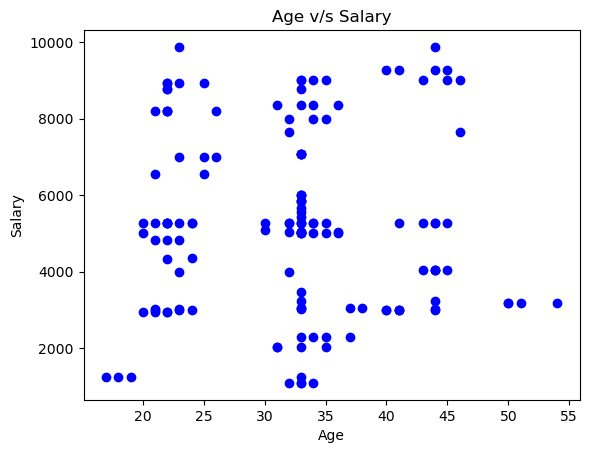

In [43]:
plt.scatter(data['Age'],data['Salary'],color='blue')
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age v/s Salary")
plt.show()

In [44]:
x=data['Place'].value_counts().index
x

Index(['Mumbai', 'kolkata', 'Chennai', 'Delhi', 'Cochin', 'Noida', 'Hyderabad',
       'Other'],
      dtype='object', name='Place')

In [45]:
y=data['Place'].value_counts().values
y

array([37, 37, 20, 14, 13,  8,  8,  7], dtype=int64)

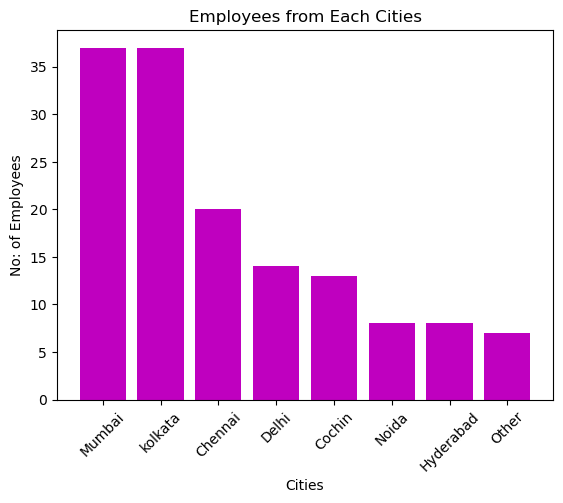

In [46]:
plt.bar(x,y,color='m')
plt.xlabel("Cities")
plt.ylabel("No: of Employees")
plt.title("Employees from Each Cities")
plt.xticks(rotation=45)
plt.show()

In [47]:
data['Gender'].replace(0,'M',inplace=True)
data['Gender'].replace(1,'F',inplace=True)

C:\Users\Harsh\AppData\Local\Temp\ipykernel_17660\3756039940.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].replace(0,'M',inplace=True)


In [48]:
data

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5283.0,Chennai,India,M
1,Infosys,30.0,5283.0,Mumbai,India,M
2,TCS,35.0,2300.0,kolkata,India,M
3,Infosys,40.0,3000.0,Delhi,India,M
4,TCS,23.0,4000.0,Mumbai,India,M
...,...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,India,M
140,TCS,33.0,9024.0,kolkata,India,F
141,Infosys,44.0,4034.0,Delhi,India,F
142,TCS,33.0,5034.0,Mumbai,India,F


In [49]:
data.describe()

,Age,Salary
count,144.000000,144.000000
mean,32.194444,5283.395833
std,8.242206,2368.350171
min,17.000000,1089.000000
25%,23.750000,3045.000000
50%,33.000000,5283.000000
75%,36.000000,7084.000000
max,54.000000,9876.000000


In [50]:
data.drop('Country',axis=1,inplace=True)
data

# because whole columns contains one value

,Company,Age,Salary,Place,Gender
0,TCS,20.0,5283.0,Chennai,M
1,Infosys,30.0,5283.0,Mumbai,M
2,TCS,35.0,2300.0,kolkata,M
3,Infosys,40.0,3000.0,Delhi,M
4,TCS,23.0,4000.0,Mumbai,M
...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,M
140,TCS,33.0,9024.0,kolkata,F
141,Infosys,44.0,4034.0,Delhi,F
142,TCS,33.0,5034.0,Mumbai,F


# OneHotEncoding

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
one = OneHotEncoder()

In [53]:
df_array=one.fit_transform(data[['Company','Place','Gender']]).toarray()
df_array

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [54]:
one.categories_

[array(['CTS', 'Infosys', 'TCS'], dtype=object),
 array(['Chennai', 'Cochin', 'Delhi', 'Hyderabad', 'Mumbai', 'Noida',
        'Other', 'kolkata'], dtype=object),
 array(['F', 'M'], dtype=object)]

In [55]:
categories=[np.array(['Cognizant','Infosys','TCS']),
            np.array(['Chennai', 'Cochin', 'Delhi', 'Hyderabad', 'Mumbai', 'Noida','Other', 'kolkata']),
            np.array(['F','M'])]
single_list=[innerlistone for main_array in categories for innerlistone in main_array]
single_list

['Cognizant',
 'Infosys',
 'TCS',
 'Chennai',
 'Cochin',
 'Delhi',
 'Hyderabad',
 'Mumbai',
 'Noida',
 'Other',
 'kolkata',
 'F',
 'M']

In [56]:
df_new=pd.DataFrame(df_array,columns=single_list)
df_new

,Cognizant,Infosys,TCS,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Noida,Other,kolkata,F,M
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
140,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
141,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
142,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [57]:
df_ml=pd.concat([data,df_new],axis=1)
df_ml

,Company,Age,Salary,Place,Gender,Cognizant,Infosys,TCS,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Noida,Other,kolkata,F,M
0,TCS,20.0,5283.0,Chennai,M,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Infosys,30.0,5283.0,Mumbai,M,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,TCS,35.0,2300.0,kolkata,M,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,Infosys,40.0,3000.0,Delhi,M,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,TCS,23.0,4000.0,Mumbai,M,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,M,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
140,TCS,33.0,9024.0,kolkata,F,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
141,Infosys,44.0,4034.0,Delhi,F,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
142,TCS,33.0,5034.0,Mumbai,F,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler=MinMaxScaler()

In [60]:
df_ml[['Age','Salary']] = scaler.fit_transform(df_ml[['Age','Salary']])

In [61]:
df_ml

,Company,Age,Salary,Place,Gender,Cognizant,Infosys,TCS,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Noida,Other,kolkata,F,M
0,TCS,0.081081,0.477296,Chennai,M,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Infosys,0.351351,0.477296,Mumbai,M,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,TCS,0.486486,0.137817,kolkata,M,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,Infosys,0.621622,0.217480,Delhi,M,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,TCS,0.162162,0.331285,Mumbai,M,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Infosys,0.135135,0.809491,Mumbai,M,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
140,TCS,0.432432,0.903039,kolkata,F,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
141,Infosys,0.729730,0.335154,Delhi,F,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
142,TCS,0.432432,0.448959,Mumbai,F,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [62]:
df_ml.drop(columns=['Gender','Place'],inplace = True)

In [64]:
df_ml.drop(columns=['Company'],inplace = True)

In [65]:
df_ml

# now data is ready for Machine Learning Algorithms.

,Age,Salary,Cognizant,Infosys,TCS,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Noida,Other,kolkata,F,M
0,0.081081,0.477296,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.351351,0.477296,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.486486,0.137817,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.621622,0.217480,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.162162,0.331285,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.135135,0.809491,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
140,0.432432,0.903039,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
141,0.729730,0.335154,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
142,0.432432,0.448959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
